# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [3]:
# train 데이터 불러오기
df = pd.read_csv("graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [4]:
# test 데이터 불러오기
test = pd.read_csv("graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [5]:
## TODO
print(f'train: \n{df.isna().sum()}, \ntest: \n{test.isna().sum()}')

train: 
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64, 
test: 
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 없네요 ^ㅡ^

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [6]:
## TODO
df = pd.get_dummies(df, columns=['Research', 'University Rating'])
test = pd.get_dummies(test, columns=['Research', 'University Rating'])

In [7]:
df

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,310,105,3.0,3.5,8.01,0.71,1,0,0,1,0,0,0
1,307,105,2.5,4.5,8.12,0.67,0,1,0,1,0,0,0
2,329,111,4.5,4.0,9.01,0.81,0,1,0,0,0,1,0
3,300,105,1.0,2.0,7.80,0.58,1,0,1,0,0,0,0
4,329,114,4.0,5.0,9.30,0.86,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,316,110,3.5,4.0,8.56,0.75,1,0,0,0,1,0,0
396,302,110,4.0,4.5,8.50,0.65,1,0,0,0,1,0,0
397,312,107,4.5,4.0,8.65,0.73,0,1,0,0,0,1,0
398,298,99,1.5,3.0,7.46,0.53,1,0,1,0,0,0,0


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research 변수가 범주형이여서 더미처리했습니다

# 3. 선형(Linear) 회귀

In [8]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [9]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [10]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 12)
training response size: (320,)
test predictors size: (80, 12)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
lr = LinearRegression()
# 2. 모델을 적합시킵니다.
## TODO
lr.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print(lr.score(X_train, y_train))

0.8284799081222938


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = lr.predict(X_test)
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0041
Variance score: 0.7667


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [15]:
## TODO
lr.intercept_

-1.2334927078877291

Q. 절편 계수의 의미는 무엇인가요?  
A. 모든 독립변수의 값이 0 일때 합격률입니다. (의미는 없습니다)

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [16]:
## TODO
pd.DataFrame(lr.coef_, X_train.columns, columns=['slope'])

,slope
GRE Score,0.001584
TOEFL Score,0.003738
SOP,0.008319
LOR,0.016720
CGPA,0.112572
Research_No,-0.013355
Research_Yes,0.013355
University Rating_1,0.006344
University Rating_2,-0.009994
University Rating_3,0.000305


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 해당 변수의 값이 1 증가할 때 합격할 확률이 기울기 만큼 증가합니다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

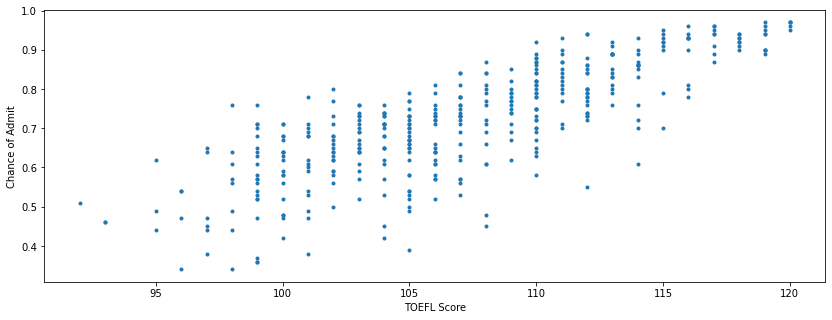

In [17]:
## TODO
plt.figure(figsize=(14,5))
plt.plot(df['TOEFL Score'], df['Chance of Admit'], 'o', ms=3)
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.show()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

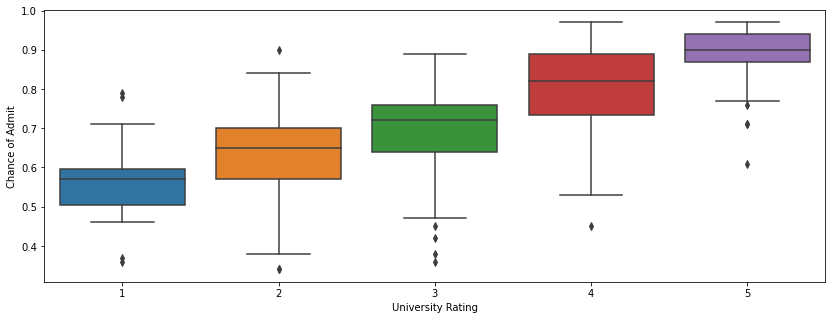

In [18]:
## TODO
plt.figure(figsize=(14,5))
sns.boxplot(data=pd.read_csv('graduate_train.csv'),
           x='University Rating',
           y='Chance of Admit')
plt.show()

### 3.2. StatsModels로 선형 회귀 시행하기

In [19]:
import statsmodels.api as sm

In [20]:
## TODO
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sun, 23 Jan 2022   Prob (F-statistic):          6.03e-112
Time:                        18:58:41   Log-Likelihood:                 451.49
No. Observations:                 320   AIC:                            -881.0
Df Residuals:                     309   BIC:                            -839.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
GRE Score               0.0016      0.001      2.484      0.014       0.000       0.003
TOEFL Score             0.0037      0.001      3.272      0.001       0.001       0.006
SOP                     0.0083      0.006      1.455      0.147      -0.003       0.020
LOR                     0.0167      0.005      3.257      0.001       0.007       0.027
CGPA                    0.1126      0.012      9.280      0.000       0.089       0.136
Research_No            -0.8944      0.097     -9.184      0.000      -1.086      -0.703
Research_Yes           -0.8677      0.101     -8.626      0.000      -1.066      -0.670
University Rating_1    -0.3461      0.039     -8.905      0.000      -0.423      -0.270
University Rating_2    -0.3624      0.039     -9.393      0.000      -0.438      -0.286
University Rating_3    -0.3521      0.039     -8.949      0.000      -0.430      -0.275
University Rating_4    -0.3607      0.042     -8.594      0.000      -0.443      -0.278
University Rating_5    -0.3408      0.044     -7.731      0.000      -0.428      -0.254
==============================================================================
Omnibus:                       67.371   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.759
Skew:                          -1.042   Prob(JB):                     1.11e-33
Kurtosis:                       5.653   Cond. No.                     2.94e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. 해당 모델은 합격률 분산의 82.2%를 설명하며, 통계적으로 유의미하므로 좋은 모델입니다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 유의미합니다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [21]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = RidgeCV(alphas=(0.1,1,10))
# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % ridge.score(X_train, y_train))
print("Training R^2: %.2f" % ridge.score(X_test, y_test))

Training R^2: 0.83
Training R^2: 0.77


In [22]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = LassoCV()
# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train, y_train)
# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % lasso.score(X_train, y_train))
print("Training R^2: %.2f" % lasso.score(X_test, y_test))

Training R^2: 0.83
Training R^2: 0.77


In [27]:
y_test

44     0.52
110    0.76
78     0.81
181    0.85
285    0.68
       ... 
299    0.73
55     0.54
129    0.89
153    0.64
90     0.94
Name: Chance of Admit, Length: 80, dtype: float64

In [30]:
test

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research_No,Research_Yes,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,304,103,5.0,4.0,8.64,1,0,0,0,0,0,1
1,297,96,2.5,1.5,7.89,1,0,0,1,0,0,0
2,302,101,2.5,3.5,7.96,1,0,0,1,0,0,0
3,318,112,4.0,3.5,8.67,1,0,0,0,1,0,0
4,304,100,1.5,2.5,7.84,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,312,107,3.0,2.0,7.90,0,1,0,0,1,0,0
96,313,94,2.5,1.5,8.13,1,0,0,1,0,0,0
97,313,109,4.0,3.5,9.00,1,0,0,0,1,0,0
98,316,104,3.0,3.5,8.00,0,1,0,0,1,0,0


In [35]:
test['Chance of Admit'] = lasso.predict(test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 12 is different from 13)

In [36]:
test['Chance of Admit'] = test['Chance of Admit'].round(2)

In [38]:
test.to_csv('graduate_submission.csv')